In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import quantstats as qs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.1, rc={
    'figure.figsize': (10, 6),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#333333',
    'xtick.color': '#666666',
    'ytick.color': '#666666'
})
import pandas_montecarlo

In [2]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

SandP_info = first_table
SandP_info.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [3]:
symbols = SandP_info['Symbol'].values.tolist()
symbols = [symbol if '.' not in symbol else symbol.replace('.','-') for symbol in symbols]
print(symbols[:15])

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK']


In [4]:
def year_check(df):
    if df.index[0].to_pydatetime().year != df.index[1].to_pydatetime().year:
        dt = stock.index[0].to_pydatetime()
        return df.drop(f'{dt.year}-{dt.month}-{dt.day}')
    else:
        return df
    # year_counts = {}
    # for i in range(len(df)-1):
    #     df.index[i].to_pydatetime().year

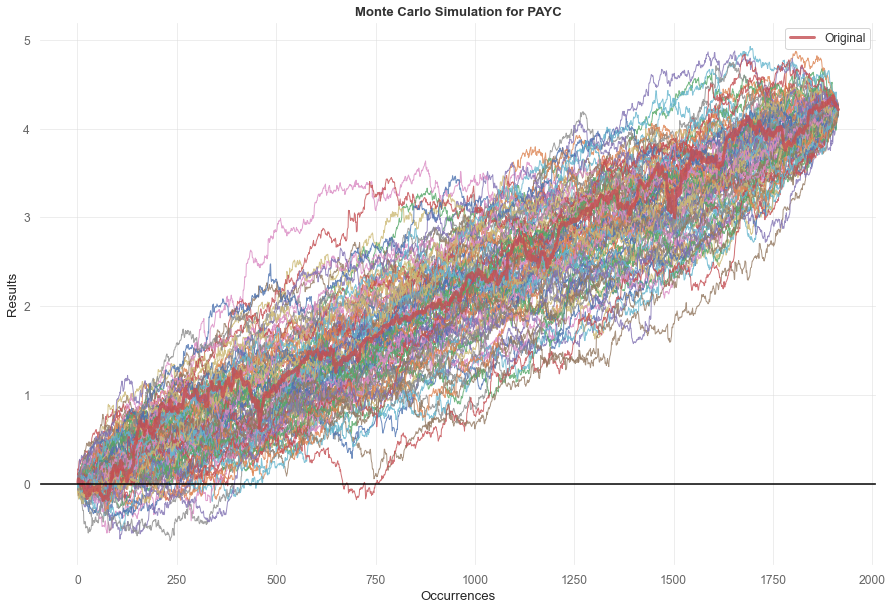

{'min': 4.213058664258969,
 'max': 4.213058664258996,
 'mean': 4.213058664258987,
 'median': 4.213058664258982,
 'std': 7.249748536800874e-15,
 'maxdd': -0.6366802901518316,
 'bust': 0.0,
 'goal': 1.0}

In [69]:
ticker = str(input())
stock = qs.utils.download_returns(ticker)
mc = stock.montecarlo(sims=100)
mc.plot(title=f'Monte Carlo Simulation for {ticker}',figsize=(15,10))
mc.stats

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


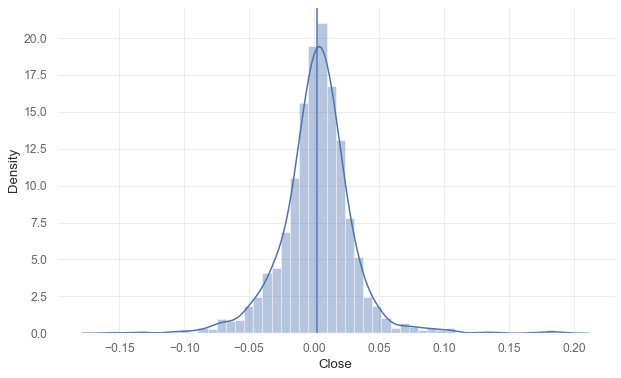

In [75]:
sns.distplot(stock)
plt.axvline(np.mean(stock))

In [83]:
np.mean(stock)

0.0022000306340777963